In [ ]:
import pandas as pd 
from matplotlib import pyplot as plt
 
# import the data 
data = pd.read_csv("final_dataset_drugs_2.0.csv",error_bad_lines=False)
df = pd.DataFrame(data)

# count the total number of respondents
total_respondents = len(df)

In [11]:
# change the color pallete
import seaborn as sns
sns.set_palette("muted")

Text(0.5, 1.0, 'Have tried substance at least once')

<Figure size 1008x1152 with 0 Axes>

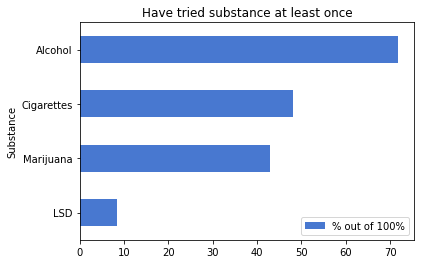

In [ ]:
# what percantage out of all respondents have tried the substance at least once
cig = df['cigever'].loc[(df['cigever']==1)]
alc = df['alcever'].loc[(df['alcever']==1)]
mj = df['mjever'].loc[(df['mjever']==1)]
lsd = df['lsd'].loc[(df['lsd']==1)]

cig_yes_proc = round(len(cig)*100/total_respondents,2)
alc_yes_proc = round(len(alc)*100/total_respondents,2)
mj_yes_proc = round(len(mj)*100/total_respondents,2)
lsd_yes_proc = round(len(lsd)*100/total_respondents,2)

plt.figure(figsize=(14,16))
df_t= pd.DataFrame({'Substance' : ['Cigarettes', 'Alcohol', 'Marijuana', 'LSD'], 
                    '% out of 100%':[cig_yes_proc,alc_yes_proc,mj_yes_proc,lsd_yes_proc]})
df_t.sort_values('% out of 100%',inplace=True)
df_t.plot(kind='barh',y='% out of 100%',x='Substance')

plt.title("Have tried substance at least once")

In [ ]:
# create a function to split participatns to age groups
def split_first_time_age_groups(col_name, new_var_name):
  df[new_var_name] = 'no data'
  df.loc[df[col_name] < 10, new_var_name] = 'Under 10'
  df.loc[df[col_name].between(10,12,inclusive="both"), new_var_name] = '10-12'
  df.loc[df[col_name].between(13,15,inclusive="both"), new_var_name] = '13-15'
  df.loc[df[col_name].between(16,17,inclusive="both"), new_var_name] = '16-17'
  df.loc[df[col_name].between(18,20,inclusive="both"), new_var_name] = '18-20'
  df.loc[df[col_name].between(21,25,inclusive="both"), new_var_name] = '21-25'
  df.loc[df[col_name].between(26,30,inclusive="both"), new_var_name] = '26-30'
  df.loc[df[col_name].between(31,40,inclusive="both"), new_var_name] = '30-40'
  df.loc[df[col_name].between(40,90,inclusive="both"), new_var_name] = 'Over 40'
  ans =  df[new_var_name].value_counts()  
  return ans


cig_age_groups = split_first_time_age_groups('ircigage','ircigage_age_groups')
alc_age_groups = split_first_time_age_groups('iralcage','iralcage_age_groups')
mj_age_groups = split_first_time_age_groups('irmjage','mj_age_groups')
lsd_age_groups = split_first_time_age_groups('irlsdage','lsd_age_groups')

Text(0.5, 1.0, 'Age when first tried the substance')

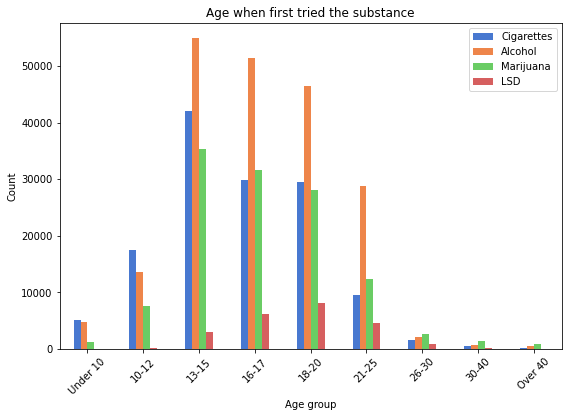

In [ ]:
age_groups = ['Under 10','10-12','13-15','16-17','18-20','21-25','26-30','30-40','Over 40']

# a function to remove rows where 'no data', as we need only people
# who have tried ther substance 
import numpy as np
def removed_no_data(group):
  ans = group.drop('no data')
  return ans

# plot the first use of substance by age groups
df_temp = pd.DataFrame({'Cigarettes': removed_no_data(cig_age_groups),
                        'Alcohol': removed_no_data(alc_age_groups),
                        'Marijuana': removed_no_data(mj_age_groups),
                        'LSD': removed_no_data(lsd_age_groups) }, index=age_groups)
ax = df_temp.plot.bar(rot=45,xlabel='Age group', ylabel='Count',figsize=(9, 6))
ax.set_title("Age when first tried the substance")

Text(0.5, 1.0, 'Decade when first tried the substance')

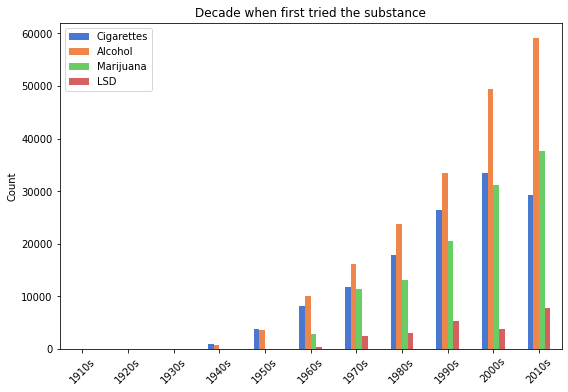

In [ ]:
decades = ['1910s','1920s','1930s','1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s']
# create a function to split the year of first use into decades
def fist_use_decades(col_name, new_var_name):
  df[new_var_name] = 'no data'
  df.loc[df[col_name] < 1920, new_var_name] = '1910s'
  df.loc[df[col_name].between(1920,1930,inclusive="left"), new_var_name] = '1920s'
  df.loc[df[col_name].between(1930,1940,inclusive="left"), new_var_name] = '1930s'
  df.loc[df[col_name].between(1940,1950,inclusive="left"), new_var_name] = '1940s'
  df.loc[df[col_name].between(1950,1960,inclusive="left"), new_var_name] = '1950s'
  df.loc[df[col_name].between(1960,1970,inclusive="left"), new_var_name] = '1960s'
  df.loc[df[col_name].between(1970,1980,inclusive="left"), new_var_name] = '1970s'
  df.loc[df[col_name].between(1980,1990,inclusive="left"), new_var_name] = '1980s'
  df.loc[df[col_name].between(1990,2000,inclusive="left"), new_var_name] = '1990s'
  df.loc[df[col_name].between(2000,2010,inclusive="left"), new_var_name] = '2000s'
  df.loc[(df[col_name] > 2010) & (df[col_name] != 9999), new_var_name] = '2010s'
  ans  = df[new_var_name].value_counts()
  return ans 

cig_decades = fist_use_decades('ircigyfu', 'cigfu_decades')
alc_decades = fist_use_decades('iralcyfu', 'alcfu_decades')
mj_decades = fist_use_decades('irmjyfu', 'mj_decades')
lsd_decades = fist_use_decades('irlsdyfu', 'lsd_decades')

df_temp = pd.DataFrame({'Cigarettes': removed_no_data(cig_decades),
                        'Alcohol': removed_no_data(alc_decades),
                        'Marijuana': removed_no_data(mj_decades),
                        'LSD': removed_no_data(lsd_decades ) }, index=decades)
ax = df_temp.plot.bar(rot=45, ylabel='Count',figsize=(9, 6) )
ax.set_title("Decade when first tried the substance")

# 1&2 hipothesis
1.	People tend to abuse alcohol more often than marijuana. 
2.	More men have substance abuse problems compared to women.


In [ ]:
from tabulate import tabulate
# % of total who abuse alc/mrj
abuse_alc_perc = df['abusealc'].loc[ df['abusealc']==1].value_counts()*100/total_respondents
abuse_mrj_perc = df['abusemrj'].loc[ df['abusemrj']==1].value_counts()*100/total_respondents

# no. of men/women who abuse alc
abuse_alc_men = len(df.loc[(df['abusealc']==1)&(df['irsex']==1)])
abuse_alc_women = len(df.loc[(df['abusealc']==1)&(df['irsex']==2)])

# % of alc abusers by sex
abuse_alc_men_perc = abuse_alc_men*100/(abuse_alc_men+abuse_alc_women)
abuse_alc_women_perc = abuse_alc_women*100/(abuse_alc_men+abuse_alc_women)

# no. of men/women who abuse mrj
abuse_mrj_men = len(df.loc[(df['abusemrj']==1)&(df['irsex']==1)])
abuse_mrj_women = len(df.loc[(df['abusemrj']==1)&(df['irsex']==2)])

# % of mrj abusers by sex
abuse_mrj_men_perc = abuse_mrj_men*100/(abuse_mrj_men+abuse_mrj_women)
abuse_mrj_women_perc = abuse_mrj_women*100/(abuse_mrj_men+abuse_mrj_women)


d = [ ['Alcohol',abuse_alc_perc,abuse_alc_men_perc,abuse_alc_women_perc],
      ['Marijuana',abuse_mrj_perc,abuse_mrj_men_perc,abuse_mrj_women_perc]]

print(tabulate(d, headers=["Substances", "% of respondents abuse", "% men","% women"]))


Substances      % of respondents abuse    % men    % women
------------  ------------------------  -------  ---------
Alcohol                       3.04596   60.7338    39.2662
Marijuana                     0.859715  62.4434    37.5566


# 3 hip.
3.	Race and substance abuse problems have no relationship in the sample. 

Text(0.5, 1.0, 'Substance abuse by race')

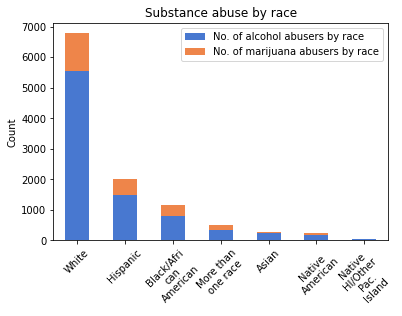

In [ ]:
# alcohol
dict = {1:'White',2:'Black/African American',3:'Native American',4:'Native HI/Other Pac. Island',5:'Asian',6:'More than one race', 7:'Hispanic'}
d = df.query('abusealc==1')['newrace2'].value_counts()
d1 = d.to_frame()
d1 = d1.rename(columns={'newrace2':"No. of alcohol abusers by race"})
d1 = d1.rename(index=dict)

# marijuana
d = df.query('abusemrj==1')['newrace2'].value_counts()
d2 = d.to_frame()
d2 = d2.rename(columns={'newrace2':"No. of marijuana abusers by race"})
d2 = d2.rename(index=dict)
d2


final_df = pd.concat([d1,d2],axis=1)
final_df

ax = final_df.plot(kind='bar',stacked=True, rot=45, ylabel='Count')
import textwrap
f = lambda x: textwrap.fill(x.get_text(), 10)
ax.set_xticklabels(map(f, ax.get_xticklabels()))
ax.set_title("Substance abuse by race")


# 4 hip.
4.	Younger age groups have more substance abuse problems.

Text(0.5, 1.0, 'Substance abuse by age')

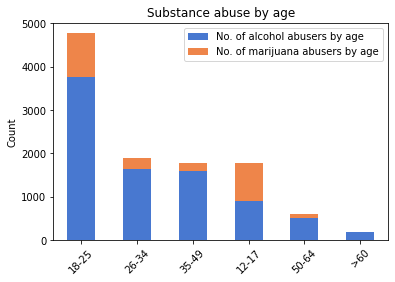

In [ ]:
# allc abuse by age
dict = {1:'12-17',2:'18-25',3:'26-34',4:'35-49',5:'50-64',6:'>60'}

d = df.query('abusealc==1')['catag6'].value_counts()
d1 = d.to_frame()
d1 = d1.rename(columns={'catag6':"No. of alcohol abusers by age"})
d1 = d1.rename(index=dict)
d1

# mrj abuse by age
d = df.query('abusemrj==1')['catag6'].value_counts()
d2 = d.to_frame()
d2 = d2.rename(columns={'catag6':"No. of marijuana abusers by age"})
d2 = d2.rename(index=dict)
d2

final_df = pd.concat([d1,d2],axis=1)
final_df

ax = final_df.plot(kind='bar',stacked=True, rot=45, ylabel='Count')
import textwrap
f = lambda x: textwrap.fill(x.get_text(), 10)
ax.set_xticklabels(map(f, ax.get_xticklabels()))
ax.set_title("Substance abuse by age")

# 5 hip
5.	Highest completed education will not influence substance abuse problems. 

Text(0.5, 1.0, 'Substance abuse by education levels')

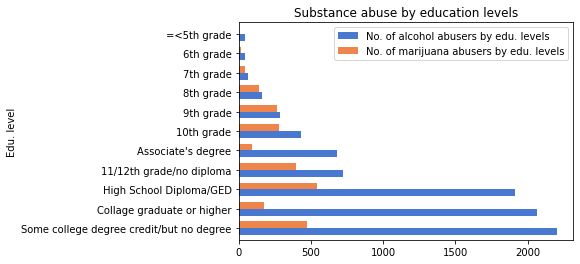

In [ ]:
# abuse and education
dict = {1:'=<5th grade',2:'6th grade',3:'7th grade',4:'8th grade',5:'9th grade',
        6:'10th grade', 7:'11/12th grade/no diploma', 8:'High School Diploma/GED',
        9:'Some college degree credit/but no degree', 10:"Associate's degree",
        11:'Collage graduate or higher'}

# alcohol
d = df.query('abusealc==1')['ireduhighst2'].value_counts()
d1 = d.to_frame()
d1 = d1.rename(columns={'ireduhighst2':"No. of alcohol abusers by edu. levels"})
d1 = d1.rename(index=dict)
d1

# marijuana
d = df.query('abusemrj==1')['ireduhighst2'].value_counts()
d2 = d.to_frame()
d2 = d2.rename(columns={'ireduhighst2':"No. of marijuana abusers by edu. levels"})
d2 = d2.rename(index=dict)
d2


final_df = pd.concat([d1,d2],axis=1)
final_df

ax = final_df.plot(kind='barh', ylabel='Edu. level',width=0.7)
ax.set_title("Substance abuse by education levels")

# 6 hip
6.	Substance abuse positively correlates with mental struggles.

Text(2.75, 52, 'Total no. of alc. abusers: 7675\nTotal no. of  non alc. abusers: 205284 ')

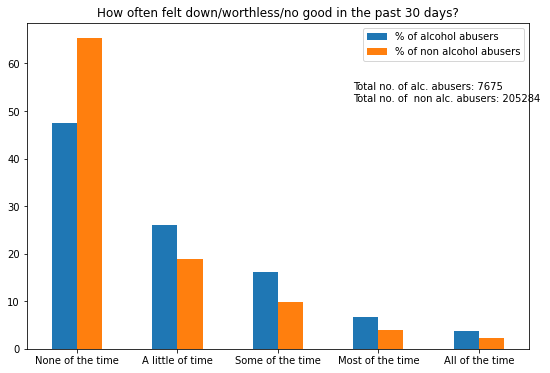

In [145]:
# adults who abuse alc how oft felt down/worthless/no good
d_abuse_alc = df.query('(dstngd30==1 | dstngd30==2 | dstngd30==3 | dstngd30==4 | dstngd30==5) & abusealc==1 ')[['abusealc','dstngd30']]
total_alc_abusers = len(d_abuse_alc)
d_abuse_alc = d_abuse_alc['dstngd30'].value_counts()*100/total_alc_abusers

# adults who do not buse alc how oft felt down/worthless/no good
d_nabuse_alc = df.query('(dstngd30==1 | dstngd30==2 | dstngd30==3 | dstngd30==4 | dstngd30==5) & abusealc==0 ')[['abusealc','dstngd30']]
total_not_alc_ab = len(d_nabuse_alc )
d_nabuse_alc = d_nabuse_alc['dstngd30'].value_counts()*100/total_not_alc_ab
d_nabuse_alc = d_nabuse_alc.rename({'dstngd30':"% of not alc abusers"})

# adults who abuse mrj how oft felt down/worthless/no good
d_abuse_mj = df.query('(dstngd30==1 | dstngd30==2 | dstngd30==3 | dstngd30==4 | dstngd30==5) & abusemrj==1 ')[['abusemrj','dstngd30']]
total_mj_ab = len(d_abuse_mj)
d_abuse_mj = d_abuse_mj['dstngd30'].value_counts()*100/total_mj_ab

# adults who do not abuse mrj how oft felt down/worthless/no good
d_nabuse_mj = df.query('(dstngd30==1 | dstngd30==2 | dstngd30==3 | dstngd30==4 | dstngd30==5) & abusemrj==0 ')[['abusemrj','dstngd30']]
total_not_mj_ab = len(d_nabuse_mj)
d_nabuse_mj = d_nabuse_mj['dstngd30'].value_counts()*100/total_not_mj_ab 

# changed the name of the columns with the same name
alc_feel = pd.concat([d_abuse_alc,d_nabuse_alc], axis=1)
cols = []
count = 1
for column in alc_feel.columns:
    if column == 'dstngd30':
        cols.append(f'dstngd30_{count}')
        count+=1
        continue
    cols.append(column)
alc_feel.columns = cols

alc_feel = alc_feel.rename(columns={'dstngd30_1':'alc abusers','dstngd30_2':'not alc abusers' })
dic = {5:'None of the time',
       4:'A little of time',
       3:'Some of the time',
       2:'Most of the time',
       1:'All of the time'}
alc_feel = alc_feel.rename(index=dic)


ax = alc_feel.plot(kind='bar', figsize=(9, 6), rot=0)
ax.legend(['% of alcohol abusers','% of non alcohol abusers'])
ax.set_title("How often felt down/worthless/no good in the past 30 days?")


ax.text(2.75, 52,f"Total no. of alc. abusers: {total_alc_abusers}\nTotal no. of  non alc. abusers: {total_not_alc_ab} ")


Text(2.75, 52, 'Total no. of marj. abusers: 1538\nTotal no. of  non marj. abusers: 211421 ')

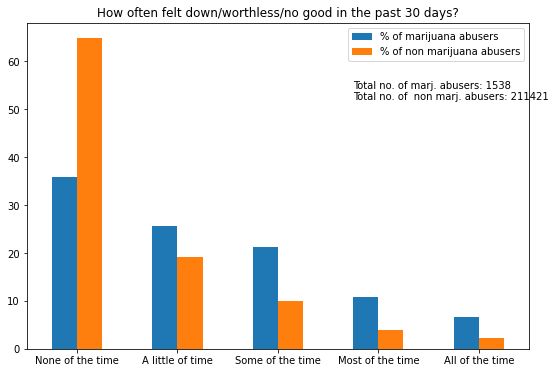

In [ ]:
mj_feel = pd.concat([d_abuse_mj,d_nabuse_mj], axis=1)
cols = []
count = 1
for column in mj_feel.columns:
    if column == 'dstngd30':
        cols.append(f'dstngd30_{count}')
        count+=1
        continue
    cols.append(column)
mj_feel.columns = cols

mj_feel = mj_feel.rename(columns={'dstngd30_1':'alc abusers','dstngd30_2':'not alc abusers' })
dic = {5:'None of the time',
       4:'A little of time',
       3:'Some of the time',
       2:'Most of the time',
       1:'All of the time'}
mj_feel = mj_feel.rename(index=dic)


ax = mj_feel.plot(kind='bar', figsize=(9, 6), rot=0)
ax.legend(['% of marijuana abusers','% of non marijuana abusers'])
ax.set_title("How often felt down/worthless/no good in the past 30 days?")

ax.text(2.75, 52,f"Total no. of marj. abusers: {total_mj_ab}\nTotal no. of  non marj. abusers: {total_not_mj_ab} ")


# 7 hip
7.	Substance abuse influences health condition.

Text(0.5, 1.0, 'How would evaluate overall health')

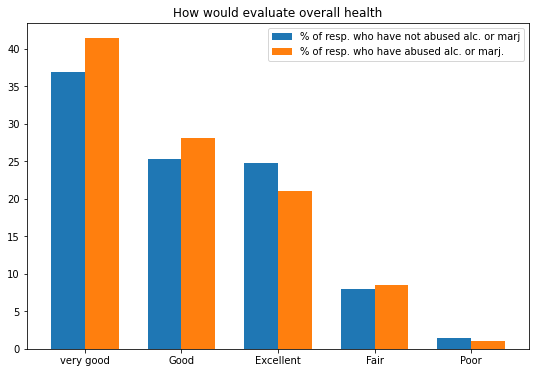

In [6]:
dic = {1:'Excellent', 2:'very good', 3:'Good', 4:'Fair', 5:'Poor'}
# health of non abusers
data_overall_health = df.query('(health==1 | health==2|health==3|health==4|health==5) & (abusealc==0 & abusemrj==0)')['health'].value_counts()*100/total_respondents
data_overall_health = data_overall_health.to_frame()
data_overall_health = data_overall_health.rename(columns={'health':'% of resp. who have not abused alc. or marj'})
data_overall_health = data_overall_health.rename(index=dic)

# health of respondents who abused alc or mrj 
abusers= len(df.query('abusealc==1 | abusemrj==1'))
data_abusers_health = df.query('(health==1 | health==2|health==3|health==4|health==5) & (abusealc==1 | abusemrj==1)')['health'].value_counts()*100/abusers
data_abusers_health = data_abusers_health.to_frame()
data_abusers_health = data_abusers_health.rename(columns={'health':'% of resp. who have abused alc. or marj.'})
data_abusers_health = data_abusers_health.rename(index=dic)

final_df = pd.concat([data_overall_health,data_abusers_health],axis=1)
final_df
ax = final_df.plot(kind='bar' ,width=0.7, figsize=(9, 6),rot=360)
ax.set_title("How would evaluate overall health")

#8 hip
8.	People who have tried marijuana are more likely to try LSD. 

In [ ]:
# counting the number of particiapnts who have tried lsd 
nr_tried_lsd = len(df.query('lsd==1'))
# counting the number of particiapnts who have tried lsd and tried mrj
nr_smoked_mj_and_lsd = len(df.query('lsd==1 & mjever==1'))

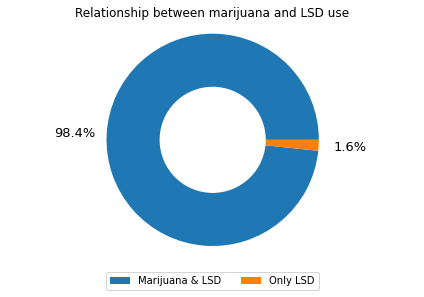

In [ ]:
import matplotlib.pyplot as plt

labels = ['Marijuana & LSD', 'Only LSD']
sizes = [nr_smoked_mj_and_lsd, nr_tried_lsd - nr_smoked_mj_and_lsd]

textprops = {"fontsize":13}
fig1, ax1 = plt.subplots()
plt.pie(sizes, autopct='%1.1f%%',pctdistance=1.3,
        shadow=False,textprops =textprops)

plt.legend(labels=labels, loc='upper center', 
           bbox_to_anchor=(0.5, -0.04), ncol=2)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.title("Relationship between marijuana and LSD use")
plt.show()


# 9 hip
9.	Older people have stronger opinions about adults trying marijuana

In [ ]:
# select participants who have stated their opinion and categorizing them by age
d = df.query('snfamjev==1 | snfamjev==2 | snfamjev==3 | snfamjev==94')[['catag6','snfamjev']]
dic_op = {1:"Nor agree nor disagree", 2:'Somewhat disapprove', 3:'Strongly disagree', 94:"Don't know"}
dic_age = {1:'12-17',2:'18-25',3:'26-34',4:'35-49',5:'50-64',6:'>60'}
d = d.replace({'snfamjev':dic_op,'catag6':dic_age})
dfu = d.groupby('snfamjev')['catag6'].value_counts().unstack()

Text(0.5, 1.0, 'How respondents feel about adults trying marijuana/hash')

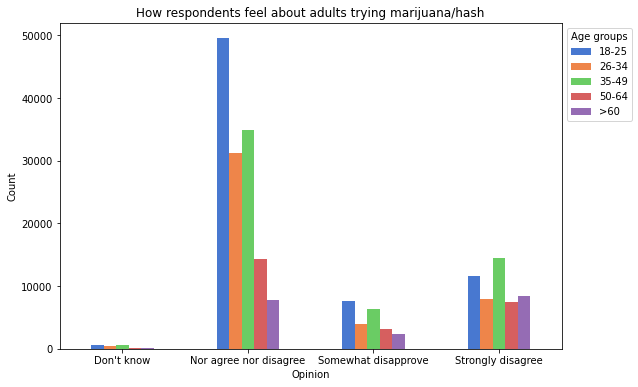

In [ ]:
ax = dfu.plot(kind='bar', figsize=(9, 6), xlabel = 'Opinion', ylabel='Count', 
              rot=0)
ax.legend(title='Age groups', bbox_to_anchor=(1, 1), loc='upper left')
ax.set_title("How respondents feel about adults trying marijuana/hash")